In [1]:
#Código Benjamin Parraguez

import pandas as pd
import numpy as np
from plotnine import *
df = pd.read_csv('datosCasas.csv') 

In [2]:
#Eliminamos las columnas inecesarias para el clustering

df = df.drop(['id','date','waterfront','view','condition','grade','sqft_lot15','sqft_living15','long','lat','zipcode'], axis=1)

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0


In [4]:
df = df.dropna() #eliminamos los datos con NA

In [5]:
#Eliminamos las filas en las cuales no existen baños ni piezas en las casas

baños = df["bathrooms"]
piezas = df["bedrooms"]

for i in range (21613) :

    if baños[i] == 0 or piezas[i] == 0:
        df = df.drop(index = i)
        
print(len(df))

21597


In [6]:
from sklearn import datasets
#Escalando los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Creamos un objeto de la clase StandardScaler
scaled_features = scaler.fit_transform(df) #Transformamos los datos


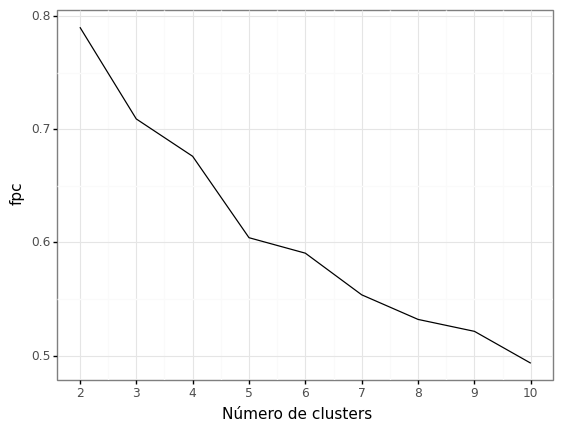

<ggplot: (107098594196)>

In [8]:
sse = []
for k in range(2, 11): #buscando el valor de K usando fuzzy partition coefficient
    (CentrosClusters, u, _, _, _, _, fpc) = fuzzy.cluster.cmeans(scaled_features.transpose(), c=k, m=1.5, error=0.0005, maxiter=1000)
    sse.append(fpc)
(ggplot()+aes(x=range(2, 11),y=sse)+theme_bw()+geom_line()+labs(x="Número de clusters",y="fpc")
 +scale_x_continuous(breaks=range(2,11))
)

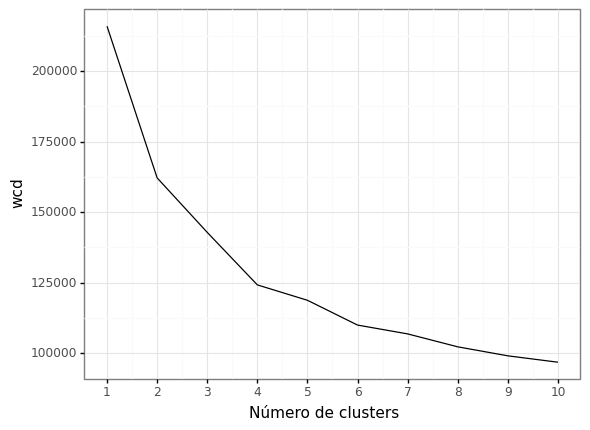

<ggplot: (107093724076)>

In [9]:
#Buscando el valor de K, usando within cluster distance
sse = []
for k in range(1, 11):
    (CentrosClusters, u, _, _, _, _, fpc) = fuzzy.cluster.cmeans(scaled_features.transpose(), c=k, m=1.5, error=0.0005, maxiter=1000)
    clusters = np.argmax(u, axis=0)
    tempWCD=0
    for j in range(CentrosClusters.shape[0]):
        tempWCD+=np.square(scaled_features[clusters==j,]-CentrosClusters[j,:]).sum()
    sse.append(tempWCD)
(ggplot()+aes(x=range(1, 11),y=sse)+theme_bw()+geom_line()+labs(x="Número de clusters",y="wcd")
 +scale_x_continuous(breaks=range(1,11)))

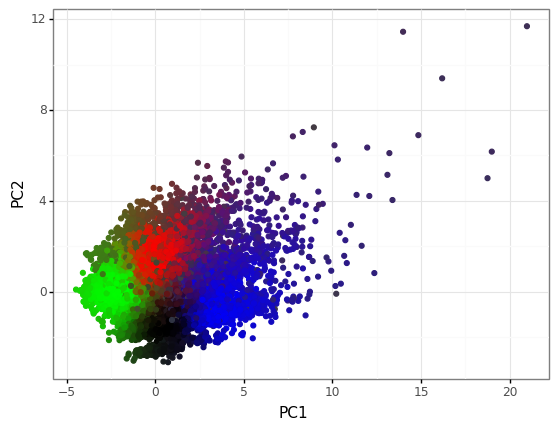

<ggplot: (106976642979)>

In [53]:
#Obteniendo 4 clusters
(CentrosClusters, u, _, _, _, _, fpc) = fuzzy.cluster.cmeans(scaled_features.transpose(), c=4, m=1.5, error=0.0005, maxiter=10000)
clusters = np.argmax(u, axis=0)


#Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)

#Creando el dataframe para graficar (caso especial de colores)
tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=clusters
tempData.insert(3, "colorPoint","")
for i in range(tempData.shape[0]):
    output=(((u[:,i])*255).astype("int"))
    tempData.iloc[i,3]='#%02x%02x%02x' % (output[0],output[1],output[2])

#Generating the plot with ggplot/plotnine
(ggplot(tempData)+aes(x="PC1",y="PC2")+theme_bw()+
   geom_point(show_legend = True,color=tempData.colorPoint)
)


In [27]:
from sklearn.metrics import silhouette_score

#importamos libreria silhouette

In [55]:
#permite trabajar el valor de silhouette

score = silhouette_score(scaled_features, clusters, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.258


In [54]:

analyze_df = df 
analyze_df['cluster'] = clusters #permite unir la variable cluster trabajada anteriormente en c-means al dataframe original

all_variables_summary = analyze_df.groupby('cluster').agg(['mean','std']) #permite analizar la media y la desviacion de los clusters

all_variables_summary.T #muestra los resultados

cluster                         0              1             2              3
price         mean  569497.672504  369458.068310  1.039336e+06  464876.411674
              std   260165.497537  160465.045454  6.042340e+05  164551.287623
bedrooms      mean       3.827093       2.777894  4.214778e+00       3.303891
              std        0.825708       0.674335  9.790576e-01       0.668954
bathrooms     mean       2.244314       1.383080  3.094004e+00       2.430226
              std        0.496571       0.423064  7.101095e-01       0.362580
sqft_living   mean    2315.714372    1326.877409  3.614311e+03    2024.800103
              std      519.372611     346.260574  8.787811e+02     481.258478
sqft_lot      mean   14690.359300   11736.012849  3.143706e+04   10881.487948
              std    36585.482401   28671.923111  7.701967e+04   26687.375616
floors        mean       1.121880       1.110987  1.967439e+00       2.055269
              std        0.277486       0.253043  2.996049e-01       0.366559
sqft_above    mean    1491.256039    1230.390848  3.256328e+03    1968.812500
              std      377.444259     339.848851  7.466064e+02     515.644964
sqft_basement mean     824.458333      96.486561  3.579828e+02      55.987603
              std      380.955559     199.347102  5.691451e+02     153.143781
yr_built      mean    1958.784420    1951.762947  1.989894e+03    1996.319215
              std       22.867728      23.804429  2.457030e+01      15.313138
yr_renovated  mean     129.878221      78.624623  1.295091e+02      28.517390
              std      492.588883     387.932099  4.920492e+02     236.868070

In [48]:
from pyclustertend import hopkins
print("Coeficiente de Hopkins:",1-hopkins(scaled_features,21597)) 

Coeficiente de Hopkins: 0.9815425005140881
